# Validation, Classification, and Evaluation

## Import Packages and Dataset

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,hamming_loss
from sklearn.model_selection import ShuffleSplit

from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset

import warnings
warnings.filterwarnings('ignore')

In [6]:
data_train = pd.read_csv("Data/Data_train.csv")
data_train.head()

,adil,aduh,agama,ah,ahok,ajak,ajar,akun,al,allah,...,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,0,1
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.525837,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,1,0,0


In [7]:
data_test = pd.read_csv("Data/Data_test.csv")
data_test.head()

,adil,aduh,agama,ah,ahok,ajak,ajar,akun,al,allah,...,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


## Features Target Split

In [11]:
X_train = data_train.drop(['HS','Abusive','HS_Individual','HS_Group','HS_Religion','HS_Race','HS_Physical','HS_Gender','HS_Other','HS_Weak','HS_Moderate','HS_Strong'],axis=1)
y_train = data_train[['HS','Abusive','HS_Individual','HS_Group','HS_Religion','HS_Race','HS_Physical','HS_Gender','HS_Other','HS_Weak','HS_Moderate','HS_Strong']]

In [12]:
X_test = data_test.drop(['HS','Abusive','HS_Individual','HS_Group','HS_Religion','HS_Race','HS_Physical','HS_Gender','HS_Other','HS_Weak','HS_Moderate','HS_Strong'],axis=1)
y_test = data_test[['HS','Abusive','HS_Individual','HS_Group','HS_Religion','HS_Race','HS_Physical','HS_Gender','HS_Other','HS_Weak','HS_Moderate','HS_Strong']]

## Cross-Validation for Hyperparameter Tuning

**1. Binary Relevance**

In [22]:
classifier_BR = BinaryRelevance(RandomForestClassifier())

**2. Classifier Chains**

In [23]:
classifier_CC = ClassifierChain(RandomForestClassifier())

**3. Label Powerset**

In [24]:
classifier_LP = LabelPowerset(RandomForestClassifier())

### Random Search Cross Validation

In [37]:
random_grid = {'classifier__n_estimators': [60,100,160,200],
               'classifier__max_features': ['auto', 'log2', None],
               'classifier__max_depth': [20, 40, 60, 80, 100, None],
               'classifier__min_samples_split': [2, 5, 10],
               'classifier__min_samples_leaf': [1, 2, 4],
               'classifier__bootstrap': [True, False]
                     }

**1. Binary Relevance**

In [38]:
random_search_BR = RandomizedSearchCV(estimator=classifier_BR,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring=None,
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

In [39]:
random_search_BR.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 829.4min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=BinaryRelevance(classifier=RandomForestClassifier(bootstrap=True,
                                                                               class_weight=None,
                                                                               criterion='gini',
                                                                               max_depth=None,
                                                                               max_features='auto',
                                                                               max_leaf_nodes=None,
                                                                               min_impurity_decrease=0.0,
                                                                               min_impurity_split=None,
                                                                               min_samples_leaf=1,
                                                

In [40]:
random_search_BR.best_params_

{'classifier__n_estimators': 200,
 'classifier__min_samples_split': 2,
 'classifier__min_samples_leaf': 1,
 'classifier__max_features': 'auto',
 'classifier__max_depth': 40,
 'classifier__bootstrap': True}

In [41]:
print("Best Params : ",random_search_BR.best_params_)
print()
means = random_search_BR.cv_results_['mean_test_score']
stds = random_search_BR.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, random_search_BR.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

Best Params :  {'classifier__n_estimators': 200, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 1, 'classifier__max_features': 'auto', 'classifier__max_depth': 40, 'classifier__bootstrap': True}

0.480 (+/-0.015) for {'classifier__n_estimators': 200, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 1, 'classifier__max_features': None, 'classifier__max_depth': 20, 'classifier__bootstrap': False}
0.485 (+/-0.018) for {'classifier__n_estimators': 100, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 2, 'classifier__max_features': 'log2', 'classifier__max_depth': None, 'classifier__bootstrap': True}
0.510 (+/-0.020) for {'classifier__n_estimators': 160, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 4, 'classifier__max_features': 'auto', 'classifier__max_depth': 20, 'classifier__bootstrap': False}
0.499 (+/-0.020) for {'classifier__n_estimators': 160, 'classifier__min_samples_split': 10, 'classifier__min_sample

**2. Classifier Chains**

In [42]:
random_search_CC = RandomizedSearchCV(estimator=classifier_CC,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring=None,
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

In [43]:
random_search_CC.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 362.5min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=ClassifierChain(classifier=RandomForestClassifier(bootstrap=True,
                                                                               class_weight=None,
                                                                               criterion='gini',
                                                                               max_depth=None,
                                                                               max_features='auto',
                                                                               max_leaf_nodes=None,
                                                                               min_impurity_decrease=0.0,
                                                                               min_impurity_split=None,
                                                                               min_samples_leaf=1,
                                                

In [44]:
print("Best Params : ",random_search_CC.best_params_)
print()
means = random_search_CC.cv_results_['mean_test_score']
stds = random_search_CC.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, random_search_CC.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

Best Params :  {'classifier__n_estimators': 200, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 1, 'classifier__max_features': 'auto', 'classifier__max_depth': 40, 'classifier__bootstrap': True}

0.578 (+/-0.011) for {'classifier__n_estimators': 200, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 1, 'classifier__max_features': None, 'classifier__max_depth': 20, 'classifier__bootstrap': False}
0.595 (+/-0.016) for {'classifier__n_estimators': 100, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 2, 'classifier__max_features': 'log2', 'classifier__max_depth': None, 'classifier__bootstrap': True}
0.591 (+/-0.014) for {'classifier__n_estimators': 160, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 4, 'classifier__max_features': 'auto', 'classifier__max_depth': 20, 'classifier__bootstrap': False}
0.602 (+/-0.017) for {'classifier__n_estimators': 160, 'classifier__min_samples_split': 10, 'classifier__min_sample

**3. Label Powerset**

In [45]:
random_search_LP = RandomizedSearchCV(estimator=classifier_LP,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring=None,
                                   cv=3, 
                                   verbose=1,
                                   n_jobs = -1,
                                   random_state=8
                                     )

In [47]:
random_search_LP.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 27.7min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=LabelPowerset(classifier=RandomForestClassifier(bootstrap=True,
                                                                             class_weight=None,
                                                                             criterion='gini',
                                                                             max_depth=None,
                                                                             max_features='auto',
                                                                             max_leaf_nodes=None,
                                                                             min_impurity_decrease=0.0,
                                                                             min_impurity_split=None,
                                                                             min_samples_leaf=1,
                                                                  

In [48]:
print("Best Params : ",random_search_LP.best_params_)
print()
means = random_search_LP.cv_results_['mean_test_score']
stds = random_search_LP.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, random_search_LP.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

Best Params :  {'classifier__n_estimators': 160, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 1, 'classifier__max_features': 'auto', 'classifier__max_depth': 80, 'classifier__bootstrap': True}

0.556 (+/-0.018) for {'classifier__n_estimators': 200, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 1, 'classifier__max_features': None, 'classifier__max_depth': 20, 'classifier__bootstrap': False}
0.604 (+/-0.015) for {'classifier__n_estimators': 100, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 2, 'classifier__max_features': 'log2', 'classifier__max_depth': None, 'classifier__bootstrap': True}
0.557 (+/-0.015) for {'classifier__n_estimators': 160, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 4, 'classifier__max_features': 'auto', 'classifier__max_depth': 20, 'classifier__bootstrap': False}
0.610 (+/-0.017) for {'classifier__n_estimators': 160, 'classifier__min_samples_split': 10, 'classifier__min_sample

In [46]:
# classifier_BR.get_params().keys()

### Grid Search Cross Validation

In [49]:
param_grid_BR = {'classifier__n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)],
               'classifier__max_features': ['auto'],
               'classifier__min_samples_split': [2],
               'classifier__min_samples_leaf': [1],
               'classifier__bootstrap': [True]
                     }

param_grid_CC = {'classifier__n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)],
               'classifier__max_features': ['auto'],
               'classifier__min_samples_split': [2],
               'classifier__min_samples_leaf': [1],
               'classifier__bootstrap': [True]
                     }

param_grid_LP = {'classifier__n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)],
               'classifier__max_features': ['auto'],
               'classifier__min_samples_split': [5],
               'classifier__min_samples_leaf': [1],
               'classifier__bootstrap': [True]
                     }

**1. Binary Relevance**

In [52]:
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

grid_search_BR = GridSearchCV(estimator=classifier_BR, 
                           param_grid=param_grid_BR,
                           cv=cv_sets,
                           n_jobs = -1,
                           verbose=1)

grid_search_BR.fit(X_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 50.7min finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             error_score='raise-deprecating',
             estimator=BinaryRelevance(classifier=RandomForestClassifier(bootstrap=True,
                                                                         class_weight=None,
                                                                         criterion='gini',
                                                                         max_depth=None,
                                                                         max_features='auto',
                                                                         max_leaf_nodes=None,
                                                                         min_impurity_decrease=0.0,
                                                                         min_impurity_split=None,
                                                                         min_samples_leaf...
                       

In [54]:
print("Best Params : ",grid_search_BR.best_params_)
print()
means = grid_search_BR.cv_results_['mean_test_score']
stds = grid_search_BR.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, grid_search_BR.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

Best Params :  {'classifier__bootstrap': True, 'classifier__max_features': 'auto', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 1000}

0.519 (+/-0.007) for {'classifier__bootstrap': True, 'classifier__max_features': 'auto', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
0.520 (+/-0.009) for {'classifier__bootstrap': True, 'classifier__max_features': 'auto', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 400}
0.521 (+/-0.011) for {'classifier__bootstrap': True, 'classifier__max_features': 'auto', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 600}
0.523 (+/-0.008) for {'classifier__bootstrap': True, 'classifier__max_features': 'auto', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 800}
0.524 (+/-0.011) for {'classifier__boot

**2. Classifier Chains**

In [55]:
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

grid_search_CC = GridSearchCV(estimator=classifier_CC, 
                           param_grid=param_grid_CC,
                           cv=cv_sets,
                           n_jobs = -1,
                           verbose=1)

grid_search_CC.fit(X_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 14.3min finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             error_score='raise-deprecating',
             estimator=ClassifierChain(classifier=RandomForestClassifier(bootstrap=True,
                                                                         class_weight=None,
                                                                         criterion='gini',
                                                                         max_depth=None,
                                                                         max_features='auto',
                                                                         max_leaf_nodes=None,
                                                                         min_impurity_decrease=0.0,
                                                                         min_impurity_split=None,
                                                                         min_samples_leaf...
                       

In [56]:
print("Best Params : ",grid_search_CC.best_params_)
print()
means = grid_search_CC.cv_results_['mean_test_score']
stds = grid_search_CC.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, grid_search_CC.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

Best Params :  {'classifier__bootstrap': True, 'classifier__max_features': 'auto', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 600}

0.602 (+/-0.008) for {'classifier__bootstrap': True, 'classifier__max_features': 'auto', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
0.605 (+/-0.014) for {'classifier__bootstrap': True, 'classifier__max_features': 'auto', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 400}
0.606 (+/-0.015) for {'classifier__bootstrap': True, 'classifier__max_features': 'auto', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 600}
0.603 (+/-0.013) for {'classifier__bootstrap': True, 'classifier__max_features': 'auto', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 800}
0.604 (+/-0.011) for {'classifier__boots

**3. Label Powerset**

In [57]:
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

grid_search_LP = GridSearchCV(estimator=classifier_LP, 
                           param_grid=param_grid_LP,
                           cv=cv_sets,
                           n_jobs = -1,
                           verbose=1)

grid_search_LP.fit(X_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  3.7min finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             error_score='raise-deprecating',
             estimator=LabelPowerset(classifier=RandomForestClassifier(bootstrap=True,
                                                                       class_weight=None,
                                                                       criterion='gini',
                                                                       max_depth=None,
                                                                       max_features='auto',
                                                                       max_leaf_nodes=None,
                                                                       min_impurity_decrease=0.0,
                                                                       min_impurity_split=None,
                                                                       min_samples_leaf=1...
                                       

In [58]:
print("Best Params : ",grid_search_LP.best_params_)
print()
means = grid_search_LP.cv_results_['mean_test_score']
stds = grid_search_LP.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, grid_search_LP.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

Best Params :  {'classifier__bootstrap': True, 'classifier__max_features': 'auto', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 1000}

0.609 (+/-0.006) for {'classifier__bootstrap': True, 'classifier__max_features': 'auto', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
0.611 (+/-0.010) for {'classifier__bootstrap': True, 'classifier__max_features': 'auto', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 400}
0.609 (+/-0.013) for {'classifier__bootstrap': True, 'classifier__max_features': 'auto', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 600}
0.609 (+/-0.010) for {'classifier__bootstrap': True, 'classifier__max_features': 'auto', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 800}
0.611 (+/-0.009) for {'classifier__boot

## Classification

In [59]:
classifier_BR = grid_search_BR.best_estimator_
classifier_CC = grid_search_CC.best_estimator_
classifier_LP = grid_search_LP.best_estimator_

**1. Binary Relevance**

In [60]:
classifier_BR.fit(X_train,y_train)

BinaryRelevance(classifier=RandomForestClassifier(bootstrap=True,
                                                  class_weight=None,
                                                  criterion='gini',
                                                  max_depth=None,
                                                  max_features='auto',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=1000,
                                                  n_jobs=None, oob_score=False,
                                                  random_state=None

In [112]:
pred_BR = classifier_BR.predict(X_test)

In [113]:
prediction_BR = y_test.copy()
prediction_BR = prediction_BR.join(pd.DataFrame(data=pred_BR.toarray(),columns=[str(x)+"_predict" for x in y_test.columns]))
prediction_BR.head()

,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,...,HS_Individual_predict,HS_Group_predict,HS_Religion_predict,HS_Race_predict,HS_Physical_predict,HS_Gender_predict,HS_Other_predict,HS_Weak_predict,HS_Moderate_predict,HS_Strong_predict
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**2. Classifier Chains**

In [101]:
classifier_CC.fit(X_train,y_train)

ClassifierChain(classifier=RandomForestClassifier(bootstrap=True,
                                                  class_weight=None,
                                                  criterion='gini',
                                                  max_depth=None,
                                                  max_features='auto',
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=600, n_jobs=None,
                                                  oob_score=False,
                                                  random_state=None,

In [102]:
pred_CC = classifier_CC.predict(X_test)

In [103]:
prediction_CC = y_test.copy()
prediction_CC = prediction_CC.join(pd.DataFrame(data=pred_CC.toarray(),columns=[str(x)+"_predict" for x in y_test.columns]))
prediction_CC.head()

,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,...,HS_Individual_predict,HS_Group_predict,HS_Religion_predict,HS_Race_predict,HS_Physical_predict,HS_Gender_predict,HS_Other_predict,HS_Weak_predict,HS_Moderate_predict,HS_Strong_predict
0,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**3. Label Powerset**

In [107]:
classifier_LP.fit(X_train,y_train)

LabelPowerset(classifier=RandomForestClassifier(bootstrap=True,
                                                class_weight=None,
                                                criterion='gini',
                                                max_depth=None,
                                                max_features='auto',
                                                max_leaf_nodes=None,
                                                min_impurity_decrease=0.0,
                                                min_impurity_split=None,
                                                min_samples_leaf=1,
                                                min_samples_split=5,
                                                min_weight_fraction_leaf=0.0,
                                                n_estimators=1000, n_jobs=None,
                                                oob_score=False,
                                                random_state=None, verbose=0,
               

In [108]:
pred_LP = classifier_LP.predict(X_test)

In [109]:
prediction_LP = y_test.copy()
prediction_LP = prediction_LP.join(pd.DataFrame(data=pred_LP.toarray(),columns=[str(x)+"_predict" for x in y_test.columns]))
prediction_LP.head()

,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,...,HS_Individual_predict,HS_Group_predict,HS_Religion_predict,HS_Race_predict,HS_Physical_predict,HS_Gender_predict,HS_Other_predict,HS_Weak_predict,HS_Moderate_predict,HS_Strong_predict
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Evaluation

In [156]:
def labelSetAccuracy(y_true, y_pred):
    acc_list = []
    for i in range(y_true.shape[0]):
        set_true = set( np.where(y_true[i])[0] )
        set_pred = set( np.where(y_pred[i])[0] )
#         print('\nset_true: {0}'.format(set_true))
#         print('set_pred: {0}'.format(set_pred))
        tmp_a = None
        if len(set_true) == 0 and len(set_pred) == 0:
            tmp_a = 1
        else:
            tmp_a = len(set_true.intersection(set_pred))/\
                    float( len(set_true.union(set_pred)) )
        #print('tmp_a: {0}'.format(tmp_a))
        acc_list.append(tmp_a)
    return np.mean(acc_list)

**1. Binary Relevance**

In [159]:
labelSetAcc_BR = labelSetAccuracy(y_test.values,prediction_BR.values)
exactAcc_BR = accuracy_score(y_test,pred_BR)
haml_BR = hamming_loss(y_test,pred_BR)

In [160]:
print("label base accuracy = ", labelSetAcc_BR)
print("accuracy = ", exactAcc_BR)
print("hamming loss = ", haml_BR)

label base accuracy =  0.6826980220072326
accuracy =  0.5298582995951417
hamming loss =  0.10931174089068826


**2. Classifier Chain**

In [162]:
labelSetAcc_CC = labelSetAccuracy(y_test.values,prediction_CC.values)
exactAcc_CC = accuracy_score(y_test,pred_CC)
haml_CC = hamming_loss(y_test,pred_CC)

In [163]:
print("label base accuracy = ", labelSetAcc_CC)
print("exact match accuracy = ", exactAcc_CC)
print("hamming loss = ", haml_CC)

label base accuracy =  0.7091870483317853
exact match accuracy =  0.6199392712550608
hamming loss =  0.11142037786774629


**3. Label Powerset**

In [164]:
labelSetAcc_LP = labelSetAccuracy(y_test.values,prediction_LP.values)
exactAcc_LP = accuracy_score(y_test,pred_LP)
haml_LP = hamming_loss(y_test,pred_LP)

In [165]:
print("label base accuracy = ", labelSetAcc_LP)
print("exact match accuracy = ", exactAcc_LP)
print("hamming loss = ", haml_LP)

label base accuracy =  0.7643990877543508
exact match accuracy =  0.6280364372469636
hamming loss =  0.11175775978407558


## Result

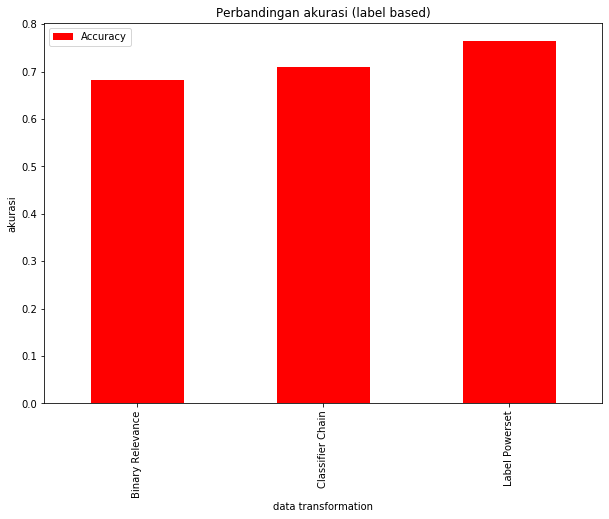

In [167]:
result_acc = pd.DataFrame({
    "Data Transformation" : ["Binary Relevance","Classifier Chain","Label Powerset"],
    "Accuracy" : [labelSetAcc_BR,labelSetAcc_CC,labelSetAcc_LP]
})

result_acc = result_acc.set_index("Data Transformation")
result_acc.plot(kind='bar',color="r",figsize=(10,7))
plt.title("Perbandingan akurasi (label based)")
plt.xlabel('data transformation')
plt.ylabel('akurasi')
plt.show()

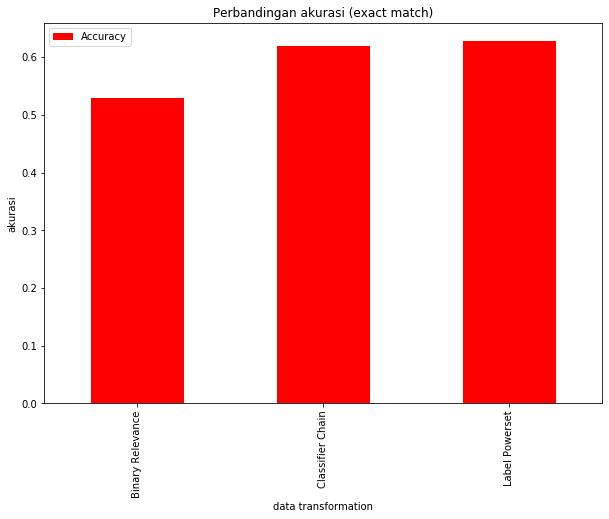

In [166]:
result_acc = pd.DataFrame({
    "Data Transformation" : ["Binary Relevance","Classifier Chain","Label Powerset"],
    "Accuracy" : [exactAcc_BR,exactAcc_CC,exactAcc_LP]
})

result_acc = result_acc.set_index("Data Transformation")
result_acc.plot(kind='bar',color="r",figsize=(10,7))
plt.title("Perbandingan akurasi (exact match)")
plt.xlabel('data transformation')
plt.ylabel('akurasi')
plt.show()

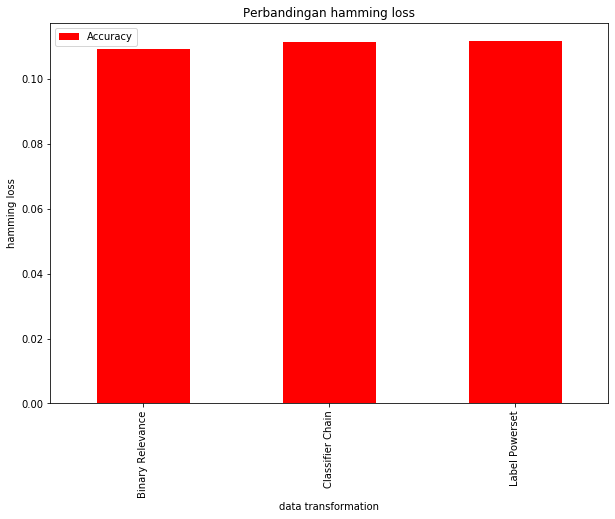

In [168]:
result_haml = pd.DataFrame({
    "Data Transformation" : ["Binary Relevance","Classifier Chain","Label Powerset"],
    "Accuracy" : [haml_BR,haml_CC,haml_LP]
})

result_haml = result_haml.set_index("Data Transformation")
result_haml.plot(kind='bar',color="r",figsize=(10,7))
plt.title("Perbandingan hamming loss")
plt.xlabel('data transformation')
plt.ylabel('hamming loss')
plt.show()